In [29]:
import numpy as np

# Define the attribute names and the target attribute
attribute_names = ["Age", "Income", "Student", "Credit_Rating", "Buys_Computer"]

# Define the dataset as a numpy array
data = np.array([
    ["<=30", "high", "no", "fair", "no"],
    ["<=30", "high", "no", "excellent", "no"],
    ["31-40", "high", "no", "fair", "yes"],
    [">40", "medium", "no", "fair", "yes"],
    [">40", "low", "yes", "fair", "yes"],
    [">40", "low", "yes", "excellent", "no"],
    ["31-40", "low", "yes", "excellent", "yes"],
    ["<=30", "medium", "no", "fair", "no"],
    ["<=30", "low", "yes", "fair", "yes"],
    [">40", "medium", "yes", "fair", "yes"],
    ["<=30", "medium", "yes", "excellent", "yes"],
    ["31-40", "medium", "no", "excellent", "yes"],
    ["31-40", "high", "yes", "fair", "yes"],
    [">40", "medium", "no", "excellent", "no"]
])

# Function to calculate the entropy of a column
def entropy(data, column):
    unique_values, counts = np.unique(data[:, column], return_counts=True)
    probabilities = counts / len(data)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Calculate and store entropies for each attribute
entropies = {}
for column in range(data.shape[1] - 1):  # Exclude the last column (target attribute)
    entropies[attribute_names[column]] = entropy(data, column)

# Find the first feature with maximum entropy
first_feature = max(entropies.items(), key=lambda item: item[1])[0]

# Print entropies of each attribute
print("Entropy of each attribute / feature:")
for attribute, entropy_val in entropies.items():
    print(f"{attribute}: {entropy_val:.3f}")

# Print the first feature to be selected for constructing the decision tree
print("First feature to be selected for constructing the decision tree:")
print(f"{first_feature}: {entropies[first_feature]:.3f}")

Entropy of each attribute / feature:
Age: 1.577
Income: 1.557
Student: 1.000
Credit_Rating: 0.985
First feature to be selected for constructing the decision tree:
Age: 1.577


In [30]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the dataset
data = [
    ["young", "high", "no", "fair", "no"],
    ["young", "high", "no", "excellent", "no"],
    ["middle-aged", "high", "no", "fair", "yes"],
    ["senior", "medium", "no", "fair", "yes"],
    ["senior", "low", "yes", "fair", "yes"],
    ["senior", "low", "yes", "excellent", "no"],
    ["middle-aged", "low", "yes", "excellent", "yes"],
    ["young", "medium", "no", "fair", "no"],
    ["young", "low", "yes", "fair", "yes"],
    ["senior", "medium", "yes", "fair", "yes"],
    ["young", "medium", "yes", "excellent", "yes"],
    ["middle-aged", "medium", "no", "excellent", "yes"],
    ["middle-aged", "high", "yes", "fair", "yes"],
    ["senior", "medium", "no", "excellent", "no"]
]

# Define column names for the DataFrame
columns = ["age", "income", "student", "credit_rating", "buys_computer"]

# Create a DataFrame from the data and column names
df = pd.DataFrame(data, columns=columns)

# Separate features (X) and target (y)
X = df.drop("buys_computer", axis=1)
y = df["buys_computer"]

# Specify categorical features to be one-hot encoded
categorical_features = ["age", "income", "student", "credit_rating"]

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), categorical_features)],
    remainder="passthrough"  # Pass non-categorical features as-is
)

# Create a Pipeline that includes preprocessing and a DecisionTreeClassifier
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier())
])

# Fit the pipeline to the data
pipeline.fit(X, y)

# Get the depth of the decision tree classifier
tree_depth = pipeline.named_steps["classifier"].get_depth()

# Print the depth of the decision tree
print(f"Tree depth: {tree_depth}")

Tree depth: 4


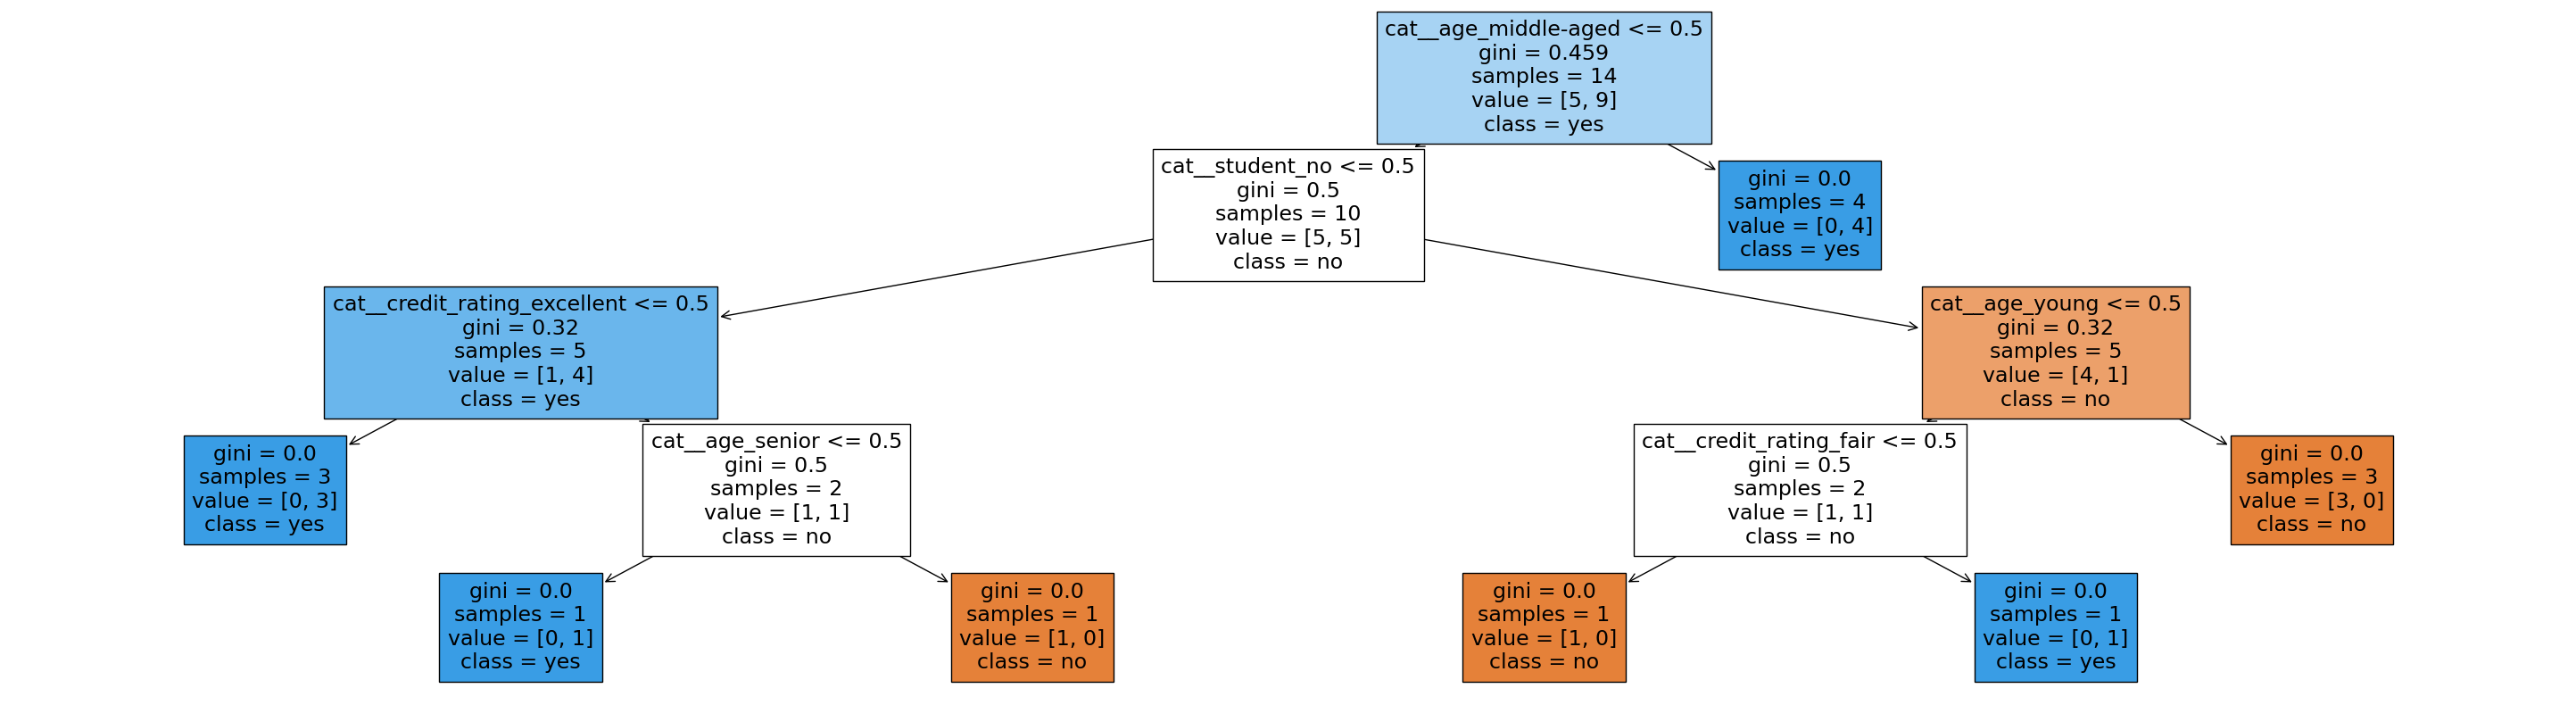

In [31]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Define the dataset
data = [
    ["young", "high", "no", "fair", "no"],
    ["young", "high", "no", "excellent", "no"],
    ["middle-aged", "high", "no", "fair", "yes"],
    ["senior", "medium", "no", "fair", "yes"],
    ["senior", "low", "yes", "fair", "yes"],
    ["senior", "low", "yes", "excellent", "no"],
    ["middle-aged", "low", "yes", "excellent", "yes"],
    ["young", "medium", "no", "fair", "no"],
    ["young", "low", "yes", "fair", "yes"],
    ["senior", "medium", "yes", "fair", "yes"],
    ["young", "medium", "yes", "excellent", "yes"],
    ["middle-aged", "medium", "no", "excellent", "yes"],
    ["middle-aged", "high", "yes", "fair", "yes"],
    ["senior", "medium", "no", "excellent", "no"]
]

# Define column names for the DataFrame
columns = ["age", "income", "student", "credit_rating", "buys_computer"]

# Create a DataFrame from the data and column names
df = pd.DataFrame(data, columns=columns)

# Separate features (X) and target (y)
X = df.drop("buys_computer", axis=1)
y = df["buys_computer"]

# Specify categorical features to be one-hot encoded
categorical_features = ["age", "income", "student", "credit_rating"]

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), categorical_features)],
    remainder="passthrough"  # Pass non-categorical features as-is
)

# Create a Pipeline that includes preprocessing and a DecisionTreeClassifier
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier())
])

# Fit the pipeline to the data
pipeline.fit(X, y)

# Get feature names after one-hot encoding and combining with non-categorical features
feature_names = list(pipeline.named_steps["preprocessor"].get_feature_names_out(input_features=categorical_features)) + list(X.columns.drop(categorical_features))

# Create a large figure for the decision tree plot
plt.figure(figsize=(37, 10))

# Plot the decision tree with filled nodes, using feature names and class names
plot_tree(pipeline.named_steps["classifier"], filled=True, feature_names=feature_names, class_names=['no', 'yes'])

# Show the decision tree plot
plt.show()

Training Set Accuracy: 0.9778172138420586
Test Set Accuracy: 0.9571428571428572


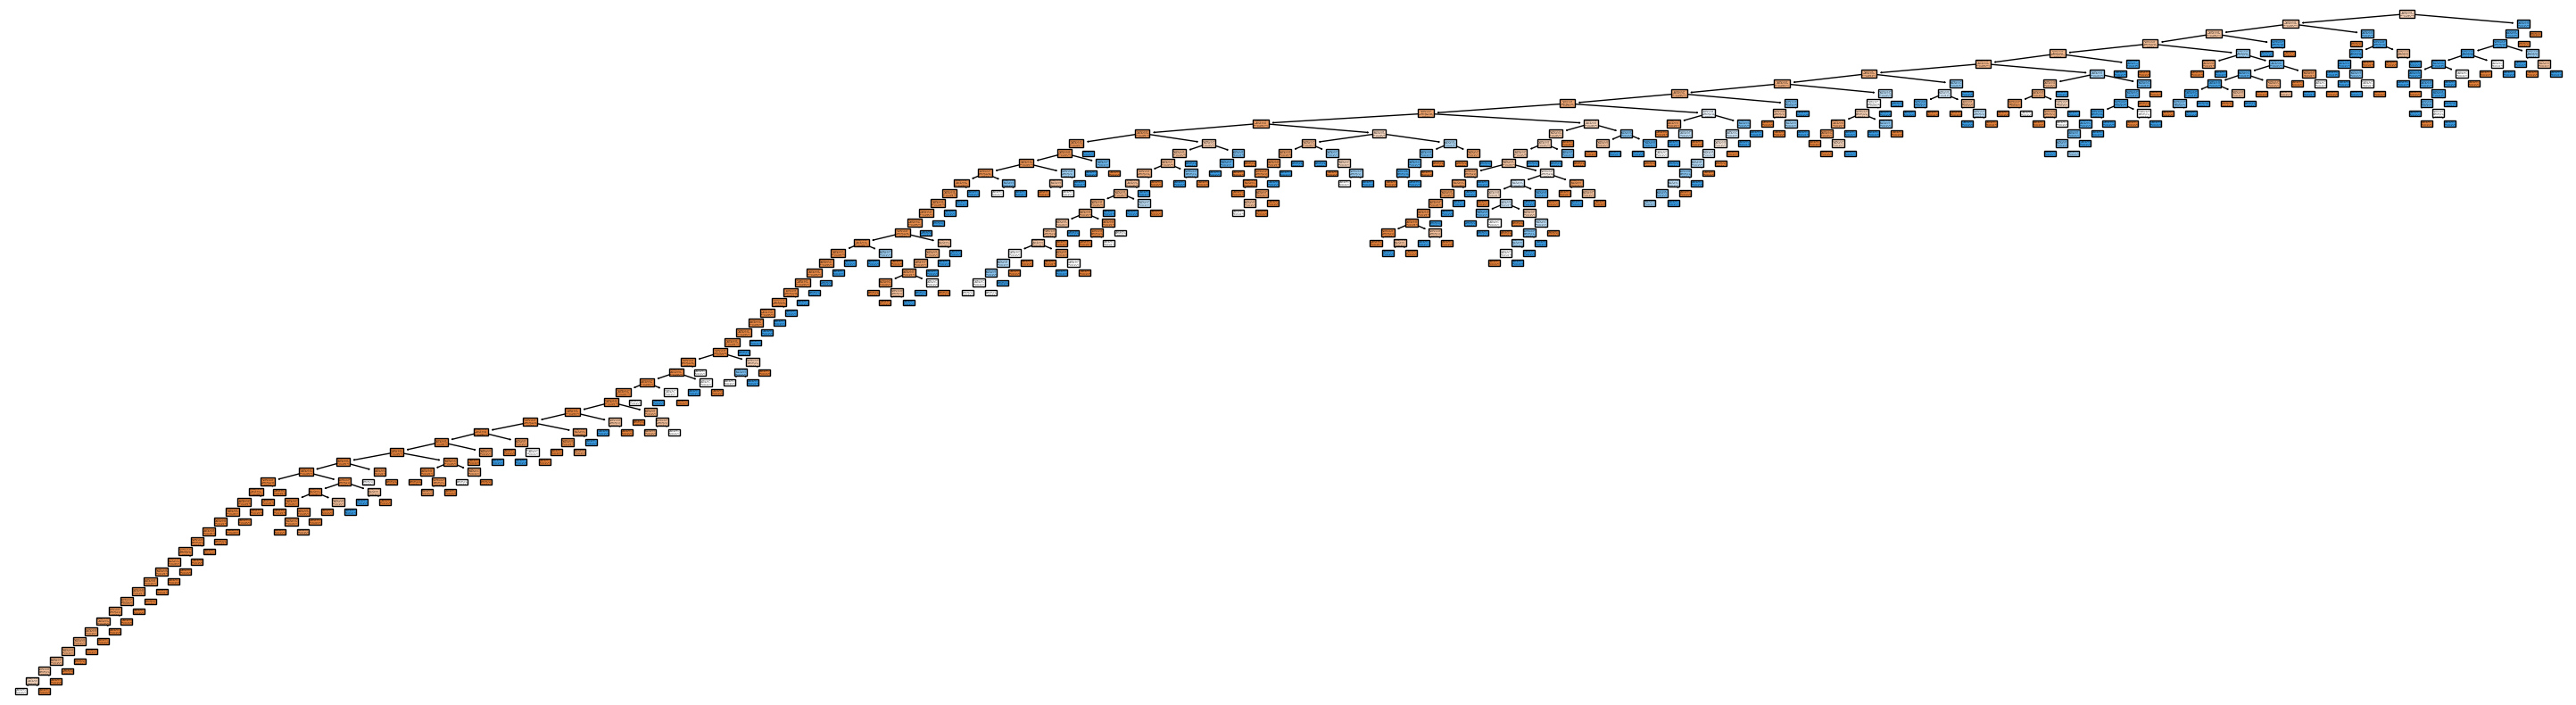

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

# Load training and testing data from Excel files
training_data = pd.read_excel('training (2).xlsx')
testing_data = pd.read_excel('testing (2).xlsx')

# Fill missing values in 'input' and 'Equation' columns with empty strings
training_data['input'].fillna('', inplace=True)
testing_data['Equation'].fillna('', inplace=True)

# Define the feature names for the CountVectorizer-generated features
vectorizer = CountVectorizer()

# Transform text data into numerical features for both training and testing data
Tr_X = vectorizer.fit_transform(training_data['input'])
Te_X = vectorizer.transform(testing_data['Equation'])

# Get the target labels for training and testing data
Tr_y = training_data['Classification']
Te_y = testing_data['Classification']

# Create a DecisionTreeClassifier model
model = DecisionTreeClassifier()

# Fit the model on the training data
model.fit(Tr_X, Tr_y)

# Calculate and print the training and test set accuracies
training_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)
print("Training Set Accuracy:", training_accuracy)
print("Test Set Accuracy:", test_accuracy)

# Create a large figure for the decision tree plot
plt.figure(figsize=(37, 10))

# Plot the decision tree with filled nodes and specified class names
plot_tree(model, filled=True, class_names=["0", "1"])

# Show the decision tree plot
plt.show()

Training Set Accuracy (with max_depth=5): 0.7577639751552795
Test Set Accuracy (with max_depth=5): 0.7


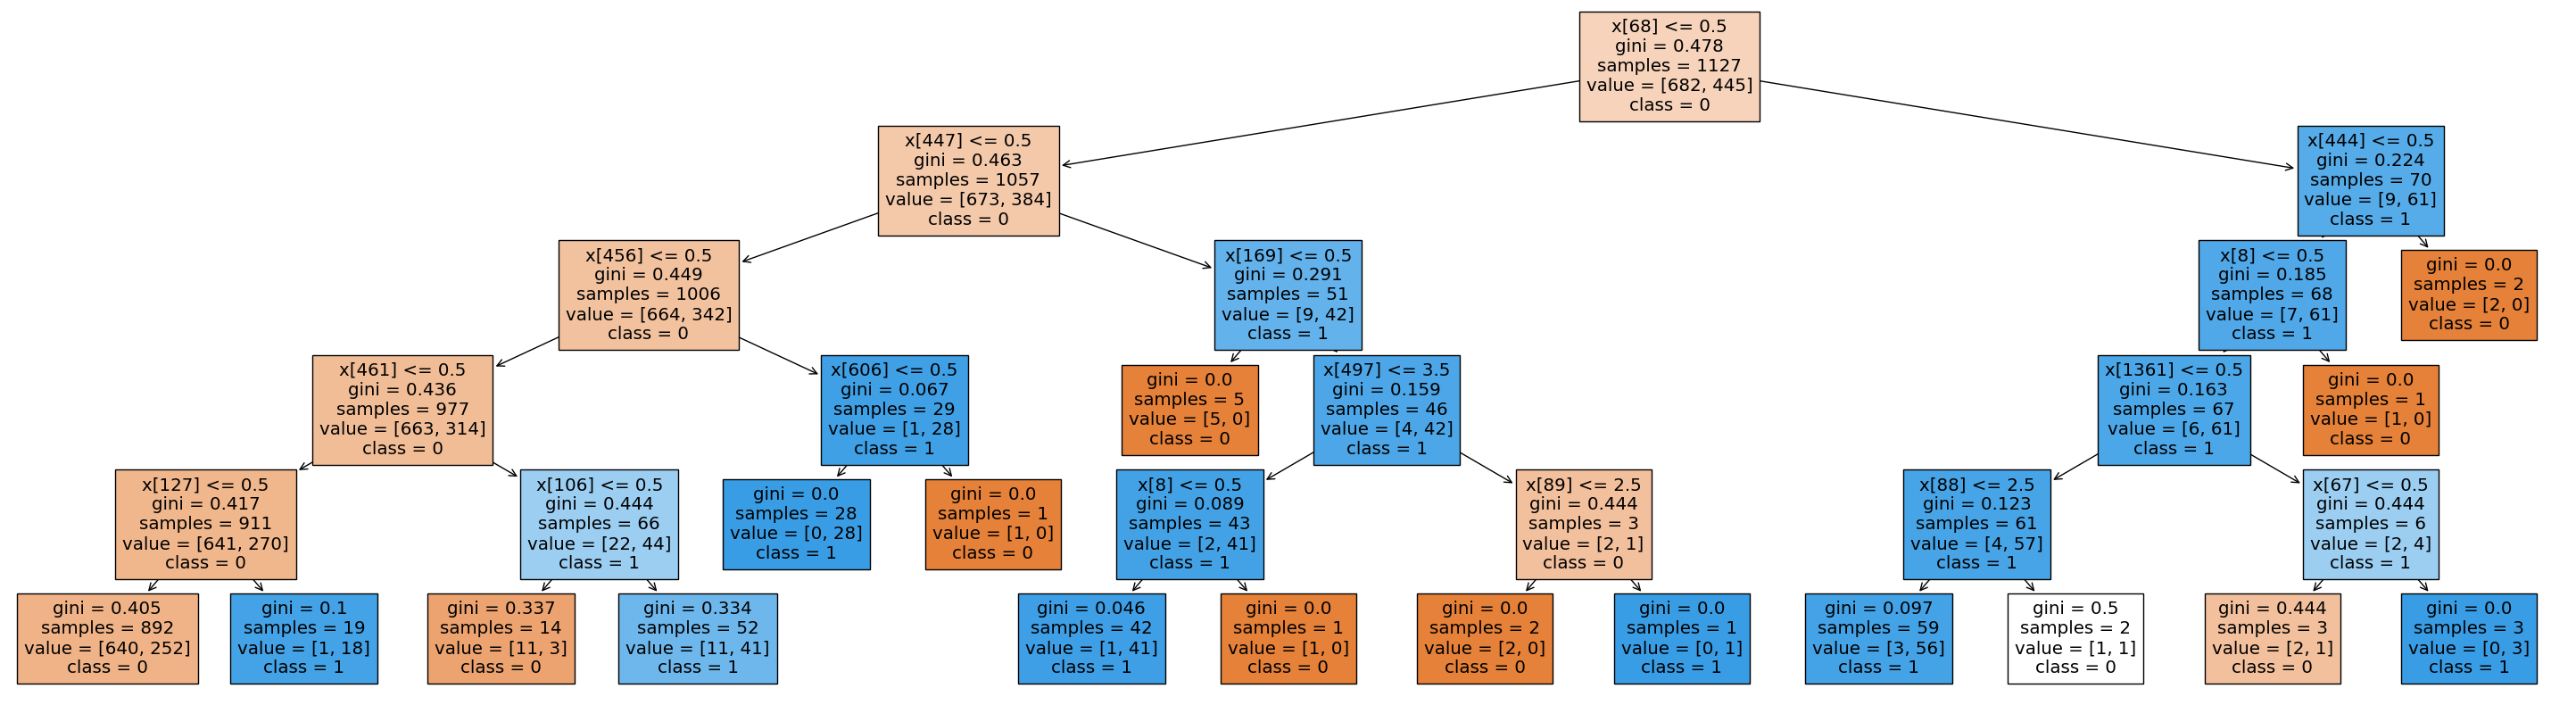

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

# Load the training and testing data from Excel files
training_data = pd.read_excel('training (2).xlsx')
testing_data = pd.read_excel('testing (2).xlsx')

# Fill missing values in the 'input' and 'Equation' columns with empty strings
training_data['input'].fillna('', inplace=True)
testing_data['Equation'].fillna('', inplace=True)

# Create a CountVectorizer to transform text data into numerical features
vectorizer = CountVectorizer()

# Transform the training and testing text data into numerical features
Tr_X = vectorizer.fit_transform(training_data['input'])
Te_X = vectorizer.transform(testing_data['Equation'])

# Get the target labels for training and testing data
Tr_y = training_data['Classification']
Te_y = testing_data['Classification']

# Create a DecisionTreeClassifier with a max_depth constraint of 5
model = DecisionTreeClassifier(max_depth=5)

# Train the Decision Tree classifier on the training data
model.fit(Tr_X, Tr_y)

# Evaluate and print the accuracy on the training and test data
training_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)
print("Training Set Accuracy (with max_depth=5):", training_accuracy)
print("Test Set Accuracy (with max_depth=5):", test_accuracy)

# Create a large figure for plotting the Decision Tree
plt.figure(figsize=(37, 10))

# Plot the Decision Tree with filled nodes and specified class names
plot_tree(model, filled=True, class_names=["0", "1"])

# Show the Decision Tree plot
plt.show()

Training Set Accuracy (with default criterion): 0.7577639751552795
Test Set Accuracy (with default criterion): 0.7


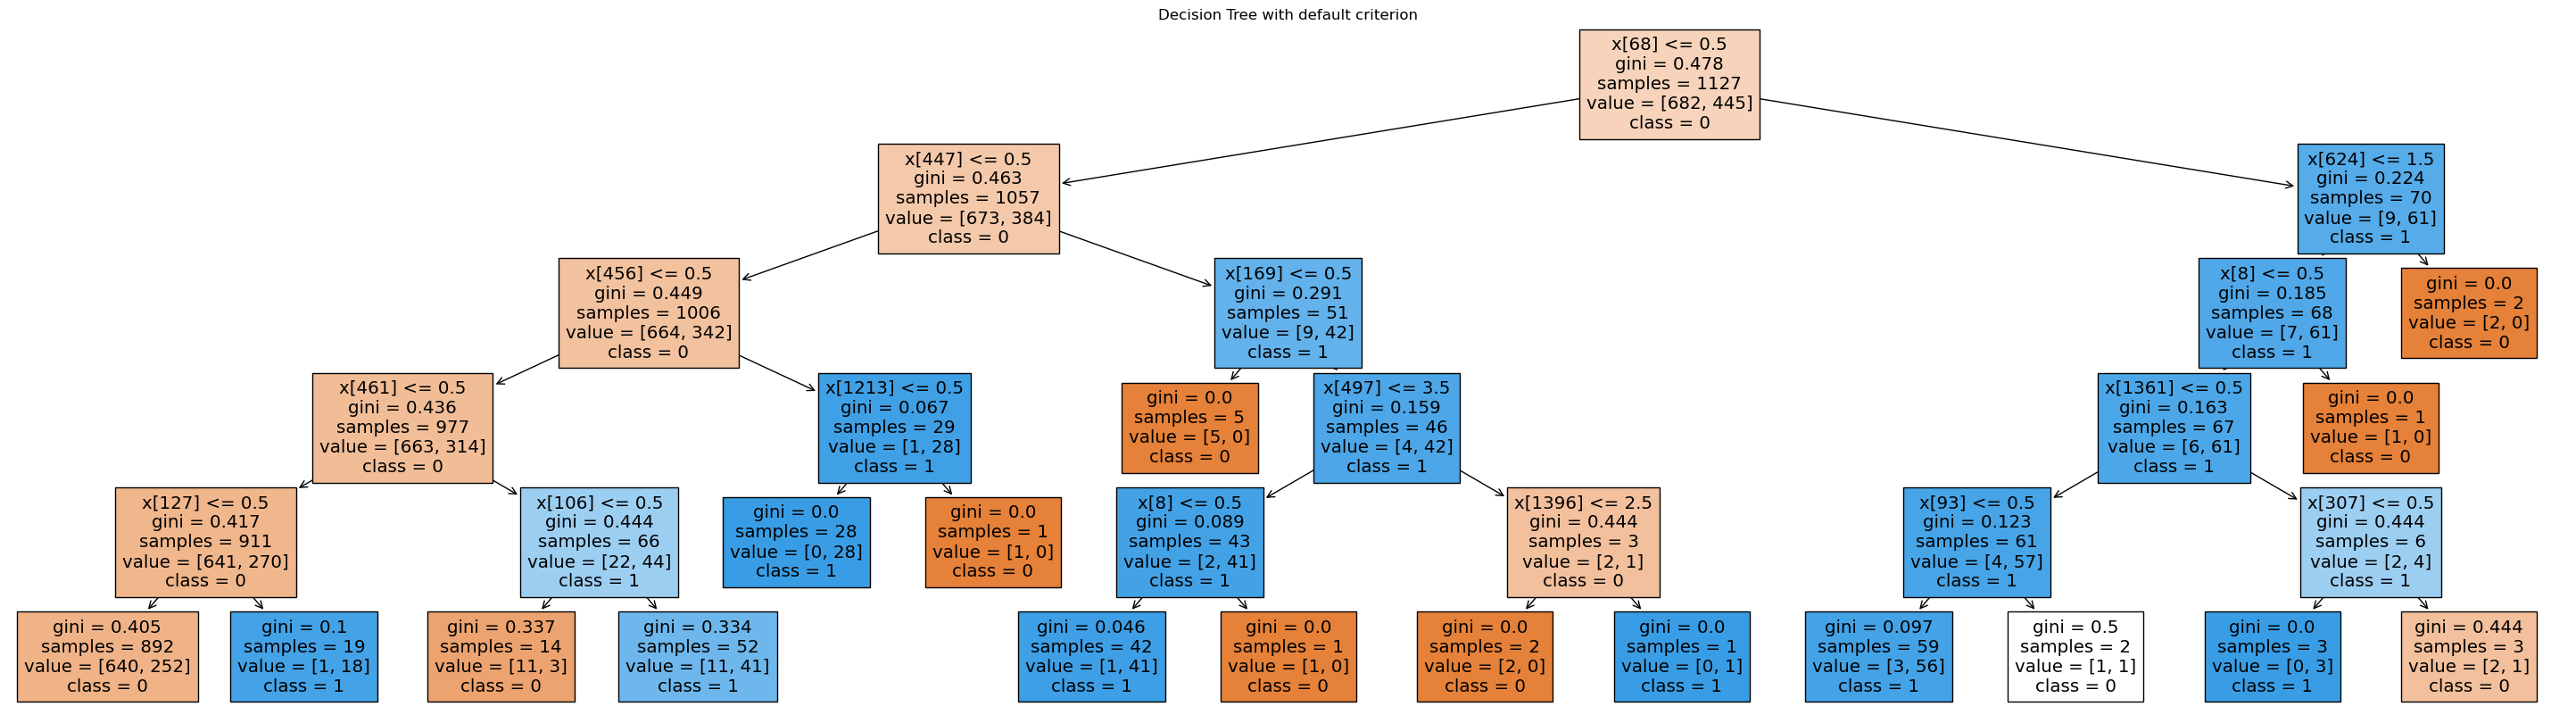


Training Set Accuracy (with 'entropy' criterion): 0.7542147293700089
Test Set Accuracy (with 'entropy' criterion): 0.6857142857142857


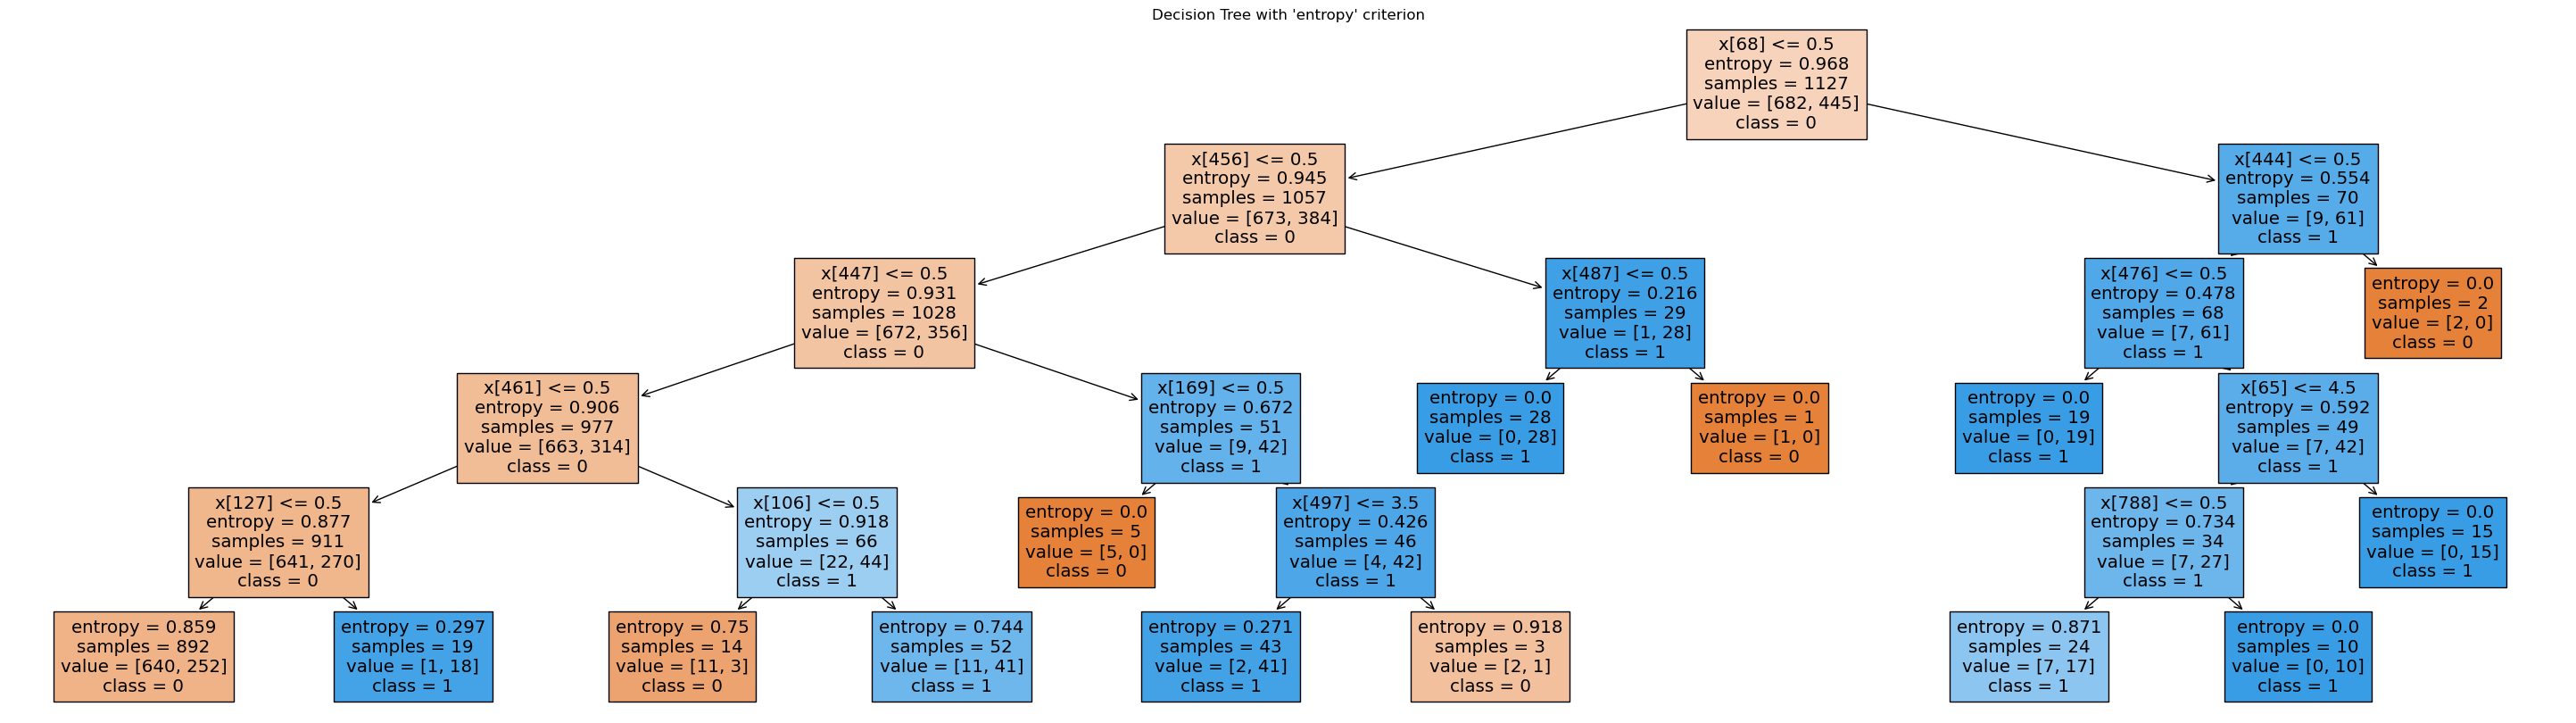

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

# Load the training and testing data from Excel files
training_data = pd.read_excel('training (2).xlsx')
testing_data = pd.read_excel('testing (2).xlsx')

# Fill missing values in the 'input' and 'Equation' columns with empty strings
training_data['input'].fillna('', inplace=True)
testing_data['Equation'].fillna('', inplace=True)

# Create a CountVectorizer to transform text data into numerical features
vectorizer = CountVectorizer()

# Transform the training and testing text data into numerical features
Tr_X = vectorizer.fit_transform(training_data['input'])
Te_X = vectorizer.transform(testing_data['Equation'])

# Get the target labels for training and testing data
Tr_y = training_data['Classification']
Te_y = testing_data['Classification']

# Create a DecisionTreeClassifier with a max depth constraint of 5 and default criterion ('gini')
model_default = DecisionTreeClassifier(max_depth=5)  

# Train the Decision Tree classifier on the training data with default criterion
model_default.fit(Tr_X, Tr_y)

# Evaluate and print the accuracy on the training and test data with default criterion
training_accuracy_default = model_default.score(Tr_X, Tr_y)
test_accuracy_default = model_default.score(Te_X, Te_y)
print("Training Set Accuracy (with default criterion):", training_accuracy_default)
print("Test Set Accuracy (with default criterion):", test_accuracy_default)

# Create a large figure for plotting the Decision Tree with default criterion
plt.figure(figsize=(37, 10))

# Plot the Decision Tree with filled nodes and specified class names for default criterion
plot_tree(model_default, filled=True, class_names=["0", "1"])
plt.title("Decision Tree with default criterion")

# Show the Decision Tree plot
plt.show()

# Create a DecisionTreeClassifier with a max depth constraint of 5 and 'entropy' criterion
model_entropy = DecisionTreeClassifier(max_depth=5, criterion="entropy")

# Train the Decision Tree classifier on the training data with 'entropy' criterion
model_entropy.fit(Tr_X, Tr_y)

# Evaluate and print the accuracy on the training and test data with 'entropy' criterion
training_accuracy_entropy = model_entropy.score(Tr_X, Tr_y)
test_accuracy_entropy = model_entropy.score(Te_X, Te_y)
print("\nTraining Set Accuracy (with 'entropy' criterion):", training_accuracy_entropy)
print("Test Set Accuracy (with 'entropy' criterion):", test_accuracy_entropy)

# Create a large figure for plotting the Decision Tree with 'entropy' criterion
plt.figure(figsize=(37, 10))

# Plot the Decision Tree with filled nodes and specified class names for 'entropy' criterion
plot_tree(model_entropy, filled=True, class_names=["0", "1"])
plt.title("Decision Tree with 'entropy' criterion")

# Show the Decision Tree plot
plt.show()

In [35]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Load the training and testing data from Excel files
training_data = pd.read_excel('training (2).xlsx')
testing_data = pd.read_excel('testing (2).xlsx')

# Fill missing values in the 'input' and 'Equation' columns with empty strings
training_data['input'].fillna('', inplace=True)
testing_data['Equation'].fillna('', inplace=True)

# Create a CountVectorizer to transform text data into numerical features
vectorizer = CountVectorizer()

# Transform the training and testing text data into numerical features
X = vectorizer.fit_transform(training_data['input'])
X_test = vectorizer.transform(testing_data['Equation'])

# Get the target labels for training and testing data
y = training_data['Classification']
y_test = testing_data['Classification']

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier with a max depth constraint of 5
decision_tree = DecisionTreeClassifier(max_depth=5)

# Fit the Decision Tree classifier on the training data
decision_tree.fit(X_train, y_train)

# Predict the labels on the validation set using the Decision Tree model
y_pred_dt = decision_tree.predict(X_val)

# Calculate and print the accuracy, confusion matrix, and classification report for Decision Tree
accuracy_dt = accuracy_score(y_val, y_pred_dt)
confusion_matrix_dt = confusion_matrix(y_val, y_pred_dt)
classification_report_dt = classification_report(y_val, y_pred_dt)

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Confusion Matrix:\n", confusion_matrix_dt)
print("Decision Tree Classification Report:\n", classification_report_dt)

# Create a RandomForestClassifier with 100 estimators and a max depth constraint of 5
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Fit the Random Forest classifier on the training data
random_forest.fit(X_train, y_train)

# Predict the labels on the validation set using the Random Forest model
y_pred_rf = random_forest.predict(X_val)

# Calculate and print the accuracy, confusion matrix, and classification report for Random Forest
accuracy_rf = accuracy_score(y_val, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_val, y_pred_rf)
classification_report_rf = classification_report(y_val, y_pred_rf)

print("\nRandom Forest Accuracy:", accuracy_rf)
print("Random Forest Confusion Matrix:\n", confusion_matrix_rf)
print("Random Forest Classification Report:\n", classification_report_rf)

Decision Tree Accuracy: 0.7256637168141593
Decision Tree Confusion Matrix:
 [[136   5]
 [ 57  28]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.96      0.81       141
           1       0.85      0.33      0.47        85

    accuracy                           0.73       226
   macro avg       0.78      0.65      0.64       226
weighted avg       0.76      0.73      0.69       226


Random Forest Accuracy: 0.7345132743362832
Random Forest Confusion Matrix:
 [[137   4]
 [ 56  29]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.97      0.82       141
           1       0.88      0.34      0.49        85

    accuracy                           0.73       226
   macro avg       0.79      0.66      0.66       226
weighted avg       0.77      0.73      0.70       226

